In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

In [39]:
df = pd.read_csv("/content/bbc_text_cls.csv")
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [40]:
df['labels'].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [41]:
df['targets'] = df['labels'].astype("category").cat.codes

In [42]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [43]:
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [44]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [45]:
K = df['targets'].max() + 1
K

5

In [46]:
D = Xtrain.shape[1]

In [47]:
# build model
i = Input(shape=(D,))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss

model = Model(i,x)

In [48]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 25188)]           0         
                                                                 
 dense_4 (Dense)             (None, 300)               7556700   
                                                                 
 dense_5 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,558,205
Trainable params: 7,558,205
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [50]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [51]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data = (Xtest, Ytest),
    epochs=7,
    batch_size=128
)

Epoch 1/7
13/13 [==============================] - 2s 144ms/step - loss: 1.4594 - accuracy: 0.7900 - val_loss: 1.1870 - val_accuracy: 0.9536
Epoch 2/7
13/13 [==============================] - 2s 127ms/step - loss: 0.8931 - accuracy: 0.9961 - val_loss: 0.7282 - val_accuracy: 0.9626
Epoch 3/7
13/13 [==============================] - 2s 124ms/step - loss: 0.4305 - accuracy: 0.9981 - val_loss: 0.4250 - val_accuracy: 0.9656
Epoch 4/7
13/13 [==============================] - 3s 223ms/step - loss: 0.1892 - accuracy: 0.9981 - val_loss: 0.2791 - val_accuracy: 0.9656
Epoch 5/7
13/13 [==============================] - 2s 179ms/step - loss: 0.0910 - accuracy: 0.9994 - val_loss: 0.2147 - val_accuracy: 0.9656
Epoch 6/7
13/13 [==============================] - 2s 122ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.1818 - val_accuracy: 0.9686
Epoch 7/7
13/13 [==============================] - 2s 121ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9716


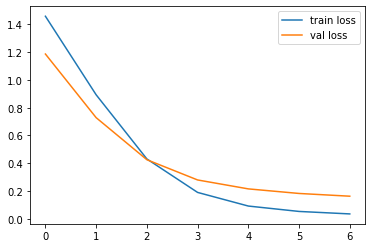

In [52]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

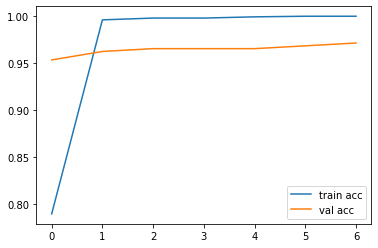

In [53]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

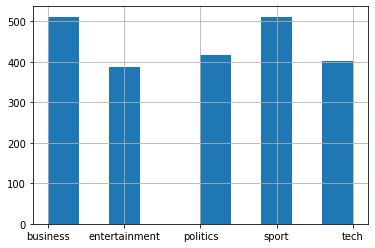

In [54]:
df['labels'].hist();